In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 1. Load Mocked_Customer_Data_With_Missing.xlsx into R/Python and save it as a data frame
# df = pd.read_excel('Mocked_Customer_Data_With_Missing.xlsx')
df = pd.read_excel('/content/drive/MyDrive/Mocked_Customer_Data_With_Missing.xlsx')
print(df.head())


   cust_id  churn_flag  gender  marrital   age  home_owner  num_cont  \
0  c000001           1    Male  divorced  49.0           0         0   
1  c000002           1    Male  divorced  33.0           0         1   
2  c000003           1  Female  divorced  38.0           0         1   
3  c000004           1  Female   married  26.0           1         1   
4  c000005           0    Male    single  55.0           0         2   

     tot_bill  tot_call  tot_bal   fortune  tot_bytes  tot_air  num_out  \
0  134.130817        53  4973.07      Mass     931.28  3046.90      194   
1  121.247165        68  4528.01       Low     580.62  3549.74      331   
2  164.144198        38  5565.09  Affluent     754.07  2996.59      139   
3  177.394137        80  5370.00  Affluent     384.81  2443.78       98   
4  155.183919        50  5101.25  Affluent      15.30  2576.98      294   

   google_bytes  google_air  yahoo_bytes  yahoo_air  
0        320.52     1270.23       194.04     710.45  
1       

In [ ]:
df.shape

(40000, 18)

In [ ]:
df.describe()

,churn_flag,age,home_owner,num_cont,tot_bill,tot_call,tot_bal,tot_bytes,tot_air,num_out,google_bytes,google_air,yahoo_bytes,yahoo_air
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.513050,44.529820,0.600000,1.998875,124.984437,74.549700,5496.517940,1504.349711,2896.281553,153.802650,319.444523,901.499544,222.769098,675.602853
std,0.499836,11.087304,0.489904,0.773621,35.678103,35.646982,742.751898,696.499597,510.388510,103.381545,107.447809,222.361519,101.929949,159.983881
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2648.750000,0.330000,751.380000,0.000000,0.330000,27.130000,0.090000,161.970000
25%,0.000000,37.000000,0.000000,1.000000,99.232921,47.000000,4947.027500,977.340000,2554.792500,73.000000,249.170000,749.750000,151.130000,548.985000
50%,1.000000,45.000000,1.000000,2.000000,129.876906,70.000000,5453.905000,1502.130000,2891.220000,150.000000,321.185000,901.640000,221.905000,676.335000
75%,1.000000,52.000000,1.000000,3.000000,152.197384,100.000000,6023.875000,2024.902500,3239.507500,226.000000,391.730000,1053.460000,291.952500,801.922500
max,1.000000,87.000000,1.000000,5.000000,235.785533,219.000000,8158.480000,3827.720000,4977.580000,588.000000,759.000000,1794.100000,648.700000,1207.910000


In [ ]:
# 2. Check the data completeness, and identify numeric vs categorical variables
# Check for missing values
print(df.isnull().sum())

# Identify numeric and categorical variables
numeric_vars = df.select_dtypes(include=['number']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric variables:", numeric_vars)
print("Categorical variables:", categorical_vars)


cust_id          0
churn_flag       0
gender           0
marrital         0
age             43
home_owner       0
num_cont         0
tot_bill        33
tot_call         0
tot_bal          0
fortune         28
tot_bytes        0
tot_air          0
num_out          0
google_bytes     0
google_air       0
yahoo_bytes      0
yahoo_air        0
dtype: int64
Numeric variables: ['churn_flag', 'age', 'home_owner', 'num_cont', 'tot_bill', 'tot_call', 'tot_bal', 'tot_bytes', 'tot_air', 'num_out', 'google_bytes', 'google_air', 'yahoo_bytes', 'yahoo_air']
Categorical variables: ['cust_id', 'gender', 'marrital', 'fortune']


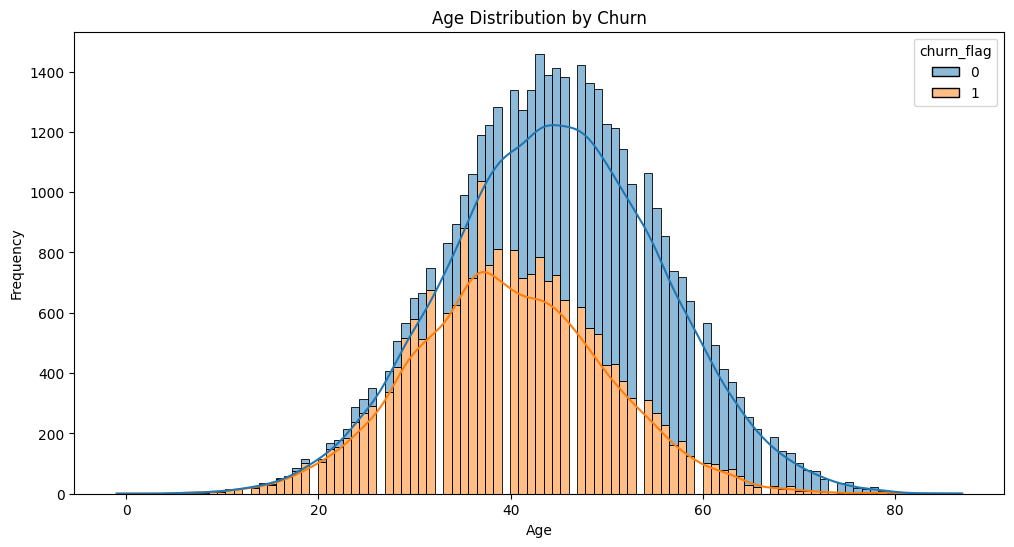

In [ ]:
# 3. Plot histograms of “age” group by “churn”
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms
#The multiple='stack' option will stack the counts of the different categories of churn on top of each other.
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='churn_flag', multiple='stack', kde=True)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# 4. Conduct a t-test of “tot_bill” regarding “churn”
from scipy import stats

# Separate the groups
group_churn = df[df['churn_flag'] == 1]['tot_bill']
group_no_churn = df[df['churn_flag'] == 0]['tot_bill']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(group_churn, group_no_churn, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value:.6f}")


T-statistic: 157.4883014368028, P-value: 0.000000


In [ ]:
print(group_churn.describe())
print(group_no_churn.describe())


count    20501.000000
mean       146.510381
std         24.584078
min          0.000000
25%        133.476816
50%        148.428431
75%        162.369745
max        235.785533
Name: tot_bill, dtype: float64
count    19466.000000
mean       102.313966
std         31.260903
min          0.000000
25%         81.030344
50%        101.463034
75%        123.344197
max        220.502097
Name: tot_bill, dtype: float64


In [ ]:
# 5. Fill out missing values if any

df['age'].fillna(df['age'].mean(), inplace=True)  # Fill missing age with mean
df['tot_bill'].fillna(df['tot_bill'].mean(), inplace=True)  # Fill missing tot_bill with mean
df['fortune'].fillna(df['fortune'].mode(), inplace=True)  # Fill missing fortune with mode


In [ ]:
# 6. Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, columns=['gender', 'marrital', 'fortune'], drop_first=True)

# Split the dataset
X = df.drop(columns=['churn_flag', 'cust_id'])
y = df['churn_flag']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df.shape

(40000, 20)

In [ ]:
df.head()

,cust_id,churn_flag,age,home_owner,num_cont,tot_bill,tot_call,tot_bal,tot_bytes,tot_air,num_out,google_bytes,google_air,yahoo_bytes,yahoo_air,gender_Male,marrital_married,marrital_single,fortune_Low,fortune_Mass
0,c000001,1,49.0,0,0,134.130817,53,4973.07,931.28,3046.90,194,320.52,1270.23,194.04,710.45,True,False,False,False,True
1,c000002,1,33.0,0,1,121.247165,68,4528.01,580.62,3549.74,331,491.50,1484.64,32.14,823.42,True,False,False,True,False
2,c000003,1,38.0,0,1,164.144198,38,5565.09,754.07,2996.59,139,283.24,764.69,182.07,718.69,False,False,False,False,False
3,c000004,1,26.0,1,1,177.394137,80,5370.00,384.81,2443.78,98,384.81,721.44,145.09,742.61,False,True,False,False,False
4,c000005,0,55.0,0,2,155.183919,50,5101.25,15.30,2576.98,294,15.30,774.92,15.30,710.88,True,False,True,False,False


In [ ]:
# 7. Build a logistic regression model to predict “churn”
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# 8. Conduct a K-fold cross validation
from sklearn.model_selection import train_test_split, KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf)

print(f'K-fold CV Accuracy: {cv_results.mean():.4f} ± {cv_results.std():.4f}')


K-fold CV Accuracy: 0.9344 ± 0.0028


In [ ]:
# 9. Interpret the result

The model correctly predicted the "churn" flag about 90.94% of the time.
Standard deviation (0.0066) suggests that the model's performance is consistent across various data subsets, enhancing the reliability of the results.

In [ ]:
# 10. Test your model performance
# Calculate precision, recall, F1-Score, ROC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, roc_curve
import matplotlib.pyplot as plt

# Fit the model on the full training data
model.fit(X_train, y_train)

# Test the model performance on validation set
y_pred = model.predict(X_valid)

# Calculate precision, recall, F1-Score, ROC
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}')


Precision: 0.9507, Recall: 0.9219, F1-Score: 0.9361, ROC AUC: 0.9477


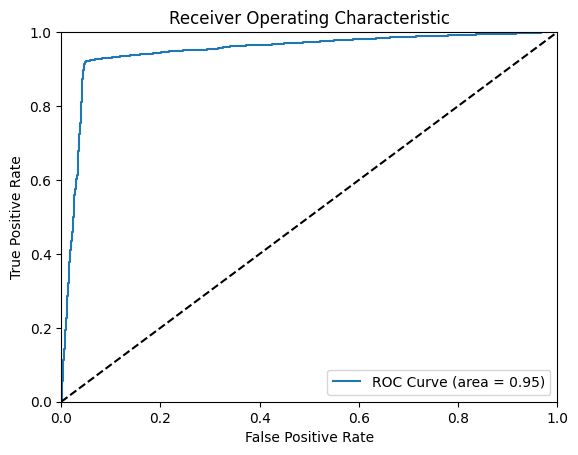

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_valid, model.predict_proba(X_valid)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

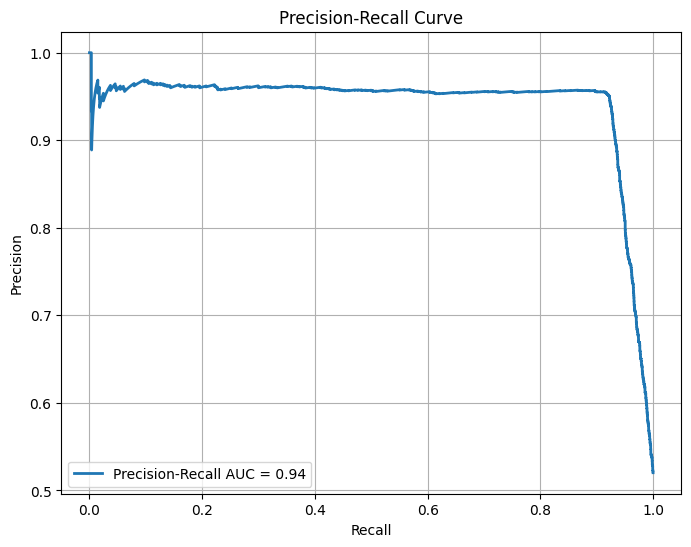

In [ ]:
# plot the Precision-Recall
from sklearn.metrics import precision_recall_curve, auc
y_scores = model.predict_proba(X_valid)[:, 1]
precision, recall, _ = precision_recall_curve(y_valid, y_scores)

auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f'Precision-Recall AUC = {auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

In [ ]:
numeric_vars.remove('churn_flag')
numeric_vars

['age',
 'home_owner',
 'num_cont',
 'tot_bill',
 'tot_call',
 'tot_bal',
 'tot_bytes',
 'tot_air',
 'num_out',
 'google_bytes',
 'google_air',
 'yahoo_bytes',
 'yahoo_air']

In [ ]:
# 11. See if any data transformation can improve the performance
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Choose the scaler
scaler = StandardScaler()  # or MinMaxScaler()

X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()

X_train_scaled[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_valid_scaled[numeric_vars] = scaler.transform(X_valid[numeric_vars])


model = LogisticRegression(max_iter=1000)
# Fit the model
model.fit(X_train_scaled, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
print(f'K-fold CV Accuracy: {cv_results.mean():.4f} ± {cv_results.std():.4f}')


K-fold CV Accuracy: 0.9340 ± 0.0025


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Choose the scaler
scaler = StandardScaler()  # or MinMaxScaler()

# Fit and transform the training data
X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()

X_train_scaled[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_valid_scaled[numeric_vars] = scaler.transform(X_valid[numeric_vars])

pca = PCA(n_components=5)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_valid_scaled)
model = LogisticRegression(max_iter=1000)
# Fit the model
model.fit(X_train_pca, y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train_pca, y_train, cv=kf)

print(f'K-fold CV Accuracy: {cv_results.mean():.4f} ± {cv_results.std():.4f}')


K-fold CV Accuracy: 0.9348 ± 0.0031


In [ ]:
# Fit the model on the full training data
# model.fit(X_train_pca, y_train)

# Test the model performance on validation set
y_pred = model.predict(X_val_pca)

# Calculate precision, recall, F1-Score, ROC
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, model.predict_proba(X_val_pca)[:, 1])

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}')


Precision: 0.9492, Recall: 0.9207, F1-Score: 0.9347, ROC AUC: 0.9459


In [ ]:
# Calculate skewness for numeric variables
skewness = df[numeric_vars].skew()

# Filter for skewed features (absolute skewness greater than 1)
skewed_features = skewness[skewness.abs() > 1]

# Print the skewed features
print(skewed_features)

Series([], dtype: float64)
